<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/home/labsuser/Datasets/311_Service_Requests_from_2010_to_Present.csv', low_memory=False)

<b>Display Complaint Type and City Together</b>

In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
sub_df = pd.concat([df['Complaint Type'], df['City']],axis=1)
#sub_df
sub_df.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


<b>Find the top 10 Complaint Types</b>

In [5]:
grpd_data = df.groupby('Complaint Type')

In [8]:
complaints_extract = pd.DataFrame(grpd_data['Unique Key'].count()).rename(columns={'Unique Key': 'No_of_Complaints'})
sorted_df = complaints_extract.sort_values('No_of_Complaints', ascending=False)
print('The top 10 complaint types are printed below')
sorted_df.head(10)

The top 10 complaint types are printed above


,No_of_Complaints
Complaint Type,
Blocked Driveway,100881
Illegal Parking,92679
Noise - Street/Sidewalk,51692
Noise - Commercial,44109
Derelict Vehicle,21661
Noise - Vehicle,19352
Animal Abuse,10541
Traffic,5198
Homeless Encampment,4879


<b>Plot a bar graph of count vs. complaint types</b>

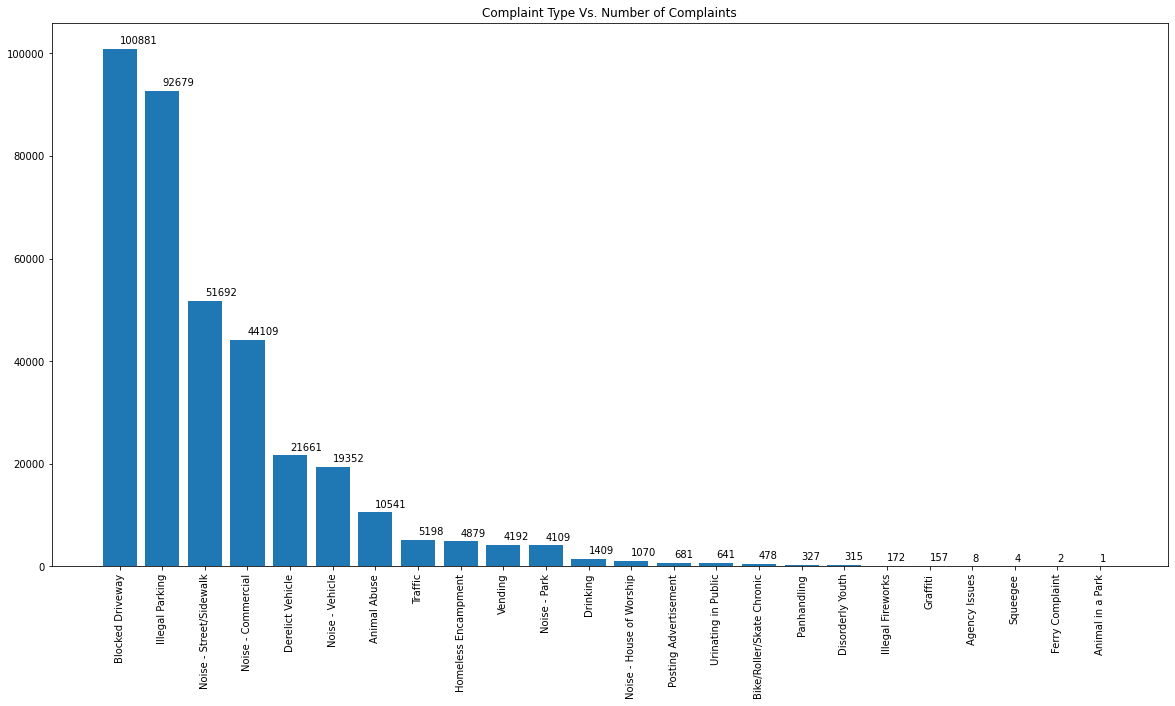

In [16]:
plt.figure(figsize=(20, 10))
plt.title('Complaint Type Vs. Number of Complaints')
plt.bar(sorted_df.index, sorted_df['No_of_Complaints'])
plt.xticks(range(0, len(sorted_df.index)), sorted_df.index, rotation=90)
for x,y in zip(sorted_df.index, sorted_df['No_of_Complaints']):
    plt.annotate(str(y), (x,y),(x,y+1000))
plt.show()

<b>No of Complaints in a City</b>

In [18]:
sub_df = pd.concat([df['Complaint Type'], df['City']],axis=1)
#sub_df
grp = sub_df.groupby('City')
data_rep = grp.agg({'Complaint Type': 'count'})
new_data_rep = data_rep.sort_values('Complaint Type', ascending = False)
new_data_rep.head(10)

,Complaint Type
City,
BROOKLYN,118862
NEW YORK,77312
BRONX,49171
STATEN ISLAND,15340
JAMAICA,8932
ASTORIA,7991
FLUSHING,7487
RIDGEWOOD,6392
CORONA,5383
